# Rac interactors during encystation of Giardia lamblia 

In [14]:
# preliminaries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [15]:
# pull in data 
data = pd.read_csv('Sim_troph_3rd_8h_1st.csv')

In [34]:
data.shape
data


,ProteinGroupID,Fasta ID,NumSeq,rac_troph,wt_troph,rac_encyst,wt_encyst
0,209,GL50803_137716,142,374,1597,412,1176
1,1819,GL50803_10167,66,211,153,92,118
2,1700,GL50803_102108,63,294,130,171,136
3,1408,GL50803_17121,61,421,413,262,297
4,342,GL50803_94440,59,107,14,66,15
5,47,GL50803_14373,55,225,316,244,340
6,1095,GL50803_103059,54,130,28,79,76
7,145,GL50803_88765,53,180,376,269,340
8,333,sp|K2C1_HUMAN|,52,192,989,87,599
9,1219,GL50803_40496,52,102,14,60,25


In [17]:
#pulls data for which Num.Seq column value is greater than 2 
sig_data = data.loc[data.NumSeq > 2]
#sig_data

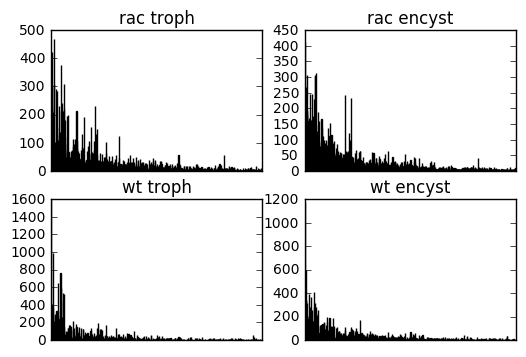

In [31]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_title('rac troph')
ax1.axes.get_xaxis().set_visible(False)
sig_data['rac_troph'].plot(kind = 'bar')

ax2 = fig.add_subplot(222)
ax2.set_title('rac encyst')
ax2.axes.get_xaxis().set_visible(False)
sig_data['rac_encyst'].plot(kind = 'bar')

ax3 = fig.add_subplot(223)
ax3.set_title('wt troph')
ax3.axes.get_xaxis().set_visible(False)
sig_data['wt_troph'].plot(kind = 'bar')

ax4 = fig.add_subplot(224)
ax4.set_title('wt encyst')
ax4.axes.get_xaxis().set_visible(False)
sig_data['wt_encyst'].plot(kind = 'bar')


In [70]:
high_prot = sig_data.loc[sig_data['NumSeq'] > 40]
low_prot = sig_data.loc[sig_data['NumSeq'] < 11]

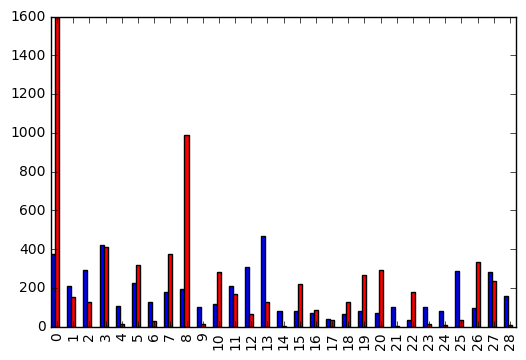

In [72]:
fig2 = plt.figure()
ax1 = fig.add_subplot(111)
high_prot.rac_troph.plot(kind = 'bar', color = 'blue', position = 1.5, width = 0.25)
high_prot.wt_troph.plot(kind = 'bar', color = 'red', position = 0.5, width = 0.25)